In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Specify the file path
file_path = r"C:\Users\faham\Downloads\Hiring_Challenge.csv"

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)


# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(data.head())


  C1     C2     C3 C4 C5 C6 C7    C8 C9 C10  C11 C12 C13  C14  C15  Hired
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202    0      1
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43  560      1
2  a   24.5  0.500  u  g  q  h  1.50  t   f    0   f   g  280  824      1
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100    3      1
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120    0      1


In [2]:
df=data

In [3]:
#Step-by-Step Process for Cleaning the Dataset

In [4]:
print(df.isnull().sum())


C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64


In [5]:
for i in df.columns:
    print(i, set(df[i]))
    print("\n")                      #checking if data have null or any other value

C1 {'a', '?', 'b'}


C2 {'23.92', '18.67', '31.58', '20.42', '21.58', '16.25', '27', '59.5', '39.58', '30.25', '29.25', '46', '37.75', '34.67', '29.5', '49', '24.75', '28.33', '43', '41', '35.58', '45.17', '19', '17.92', '35.25', '17.42', '56.5', '38.17', '42.17', '35.75', '27.83', '21.17', '21.42', '27.17', '57.58', '20.83', '34.58', '24.08', '21.33', '58.67', '20.08', '23.75', '49.58', '39.17', '56.42', '74.83', '62.75', '23.08', '22.5', '16.5', '18.58', '37.42', '21.83', '34', '26.08', '35.17', '52.42', '50.25', '39.5', '18.08', '47.75', '15.75', '42.83', '67.75', '29.58', '24.5', '30', '23.33', '20', '26.17', '48.25', '32.92', '40', '15.83', '30.58', '56.58', '?', '20.5', '44.83', '49.5', '19.5', '22.83', '33.75', '36.42', '54.42', '19.67', '40.83', '16', '22.42', '25.5', '24.58', '52.17', '76.75', '30.08', '23.42', '80.25', '13.75', '25.67', '18.92', '38.42', '47.17', '45', '41.33', '30.83', '37.5', '30.75', '42', '30.67', '27.33', '38.75', '29.67', '18', '49.17', '42.5', '16.92',

In [6]:
df.value_counts()     #checking unquie values of the column

C1  C2     C3      C4  C5  C6  C7  C8     C9  C10  C11  C12  C13  C14  C15   Hired
?   20.08  0.125   u   g   q   v   1.000  f   t    1    f    g    240  768   1        1
b   30.17  6.500   u   g   cc  v   3.125  t   t    8    f    g    330  1200  1        1
    29.67  1.415   u   g   w   h   0.750  t   t    1    f    g    240  100   1        1
    29.83  1.250   y   p   k   v   0.250  f   f    0    f    g    224  0     0        1
           2.040   y   p   x   h   0.040  f   f    0    f    g    128  1     0        1
                                                                                     ..
    16.5   0.125   u   g   c   v   0.165  f   f    0    f    g    132  0     0        1
    16.92  0.335   y   p   k   v   0.290  f   f    0    f    s    200  0     0        1
    17.08  0.085   y   p   c   v   0.040  f   f    0    f    g    140  722   0        1
           0.250   u   g   q   v   0.335  f   t    4    f    g    160  8     0        1
    ?      10.500  u   g   x   v   6.

In [7]:
new_df = df.replace('?', 0)   #replace with zero

In [8]:
new_df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,0
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,0
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,0


In [9]:
for i in new_df.columns:
    print(i, set(new_df[i]))
    print("\n")

C1 {0, 'a', 'b'}


C2 {0, '23.92', '18.67', '31.58', '20.42', '21.58', '16.25', '27', '59.5', '39.58', '30.25', '29.25', '46', '37.75', '34.67', '29.5', '49', '24.75', '28.33', '43', '41', '35.58', '45.17', '19', '17.92', '35.25', '17.42', '56.5', '38.17', '42.17', '35.75', '27.83', '21.17', '21.42', '27.17', '57.58', '20.83', '34.58', '24.08', '21.33', '58.67', '20.08', '23.75', '49.58', '39.17', '56.42', '74.83', '62.75', '23.08', '22.5', '16.5', '18.58', '37.42', '21.83', '34', '26.08', '35.17', '52.42', '50.25', '39.5', '18.08', '47.75', '15.75', '42.83', '67.75', '29.58', '24.5', '30', '23.33', '20', '26.17', '48.25', '32.92', '40', '15.83', '30.58', '56.58', '20.5', '44.83', '49.5', '19.5', '22.83', '33.75', '36.42', '54.42', '19.67', '40.83', '16', '22.42', '25.5', '24.58', '52.17', '76.75', '30.08', '23.42', '80.25', '13.75', '25.67', '18.92', '38.42', '47.17', '45', '41.33', '30.83', '37.5', '30.75', '42', '30.67', '27.33', '38.75', '29.67', '18', '49.17', '42.5', '16.92', '18

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      690 non-null    object 
 1   C2      690 non-null    object 
 2   C3      690 non-null    float64
 3   C4      690 non-null    object 
 4   C5      690 non-null    object 
 5   C6      690 non-null    object 
 6   C7      690 non-null    object 
 7   C8      690 non-null    float64
 8   C9      690 non-null    object 
 9   C10     690 non-null    object 
 10  C11     690 non-null    int64  
 11  C12     690 non-null    object 
 12  C13     690 non-null    object 
 13  C14     690 non-null    object 
 14  C15     690 non-null    int64  
 15  Hired   690 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.4+ KB


In [11]:
#checking outliers for each columns

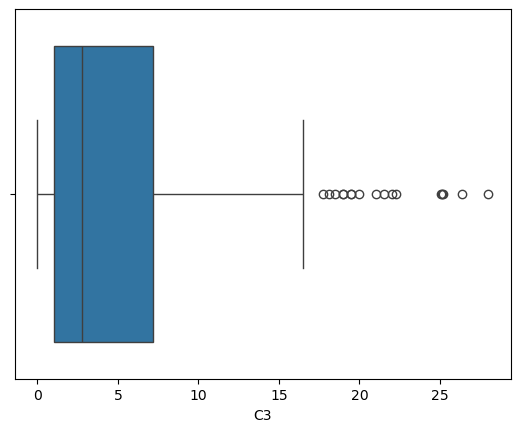

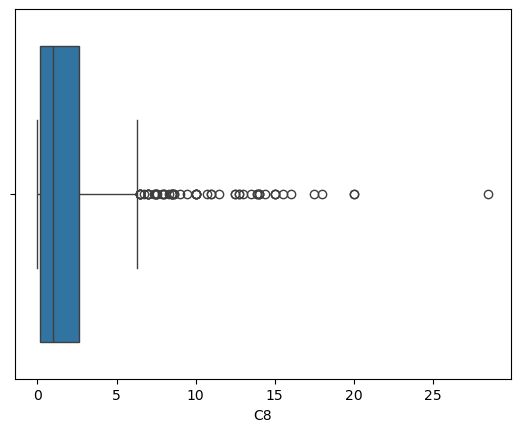

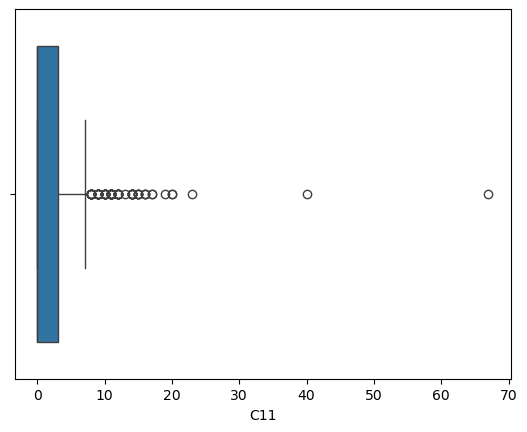

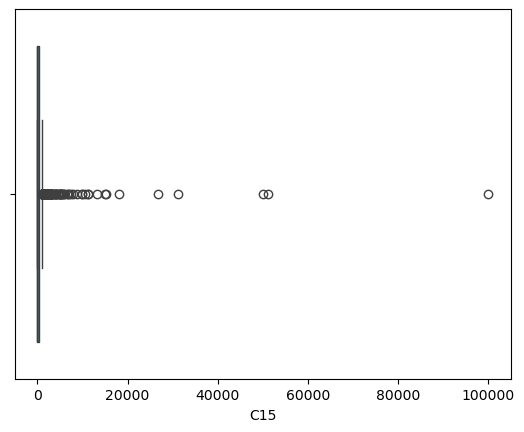

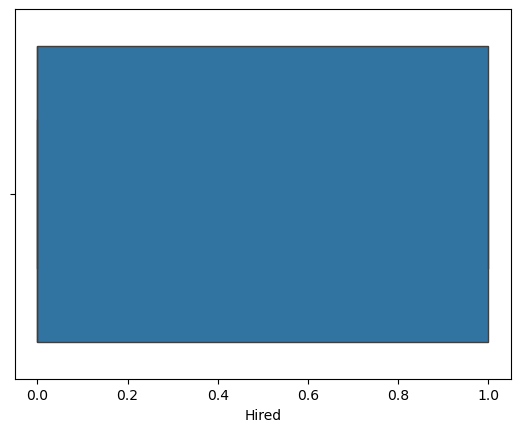

In [12]:
import warnings
warnings.filterwarnings("ignore")
for i in new_df.select_dtypes(include='number').columns:
    sns.boxplot(data=new_df,x=i)
    plt.show()

In [13]:
# List of categorical columns to encode
cat_columns = ['C1', 'C2', 'C4', 'C5', 'C6', 'C7', 'C9', 'C10', 'C12', 'C13', 'C14']

# Initialize the label encoder
label_encoder = LabelEncoder()     #label encoder for the  categorical column

# Convert all values in categorical columns to strings
for col in cat_columns:
    new_df[col] = new_df[col].astype(str)
    
# Apply label encoding to each categorical column
for col in cat_columns:
    new_df[col] = label_encoder.fit_transform(new_df[col])
# Display the first few rows of the transformed DataFrame
print(new_df.head())

   C1   C2     C3  C4  C5  C6  C7    C8  C9  C10  C11  C12  C13  C14  C15  \
0   2  157  0.000   2   1  13   8  1.25   1    1    1    0    0   42    0   
1   1  329  4.460   2   1  11   4  3.04   1    1    6    0    0  118  560   
2   1   90  0.500   2   1  11   4  1.50   1    0    0    0    0   74  824   
3   2  126  1.540   2   1  13   8  3.75   1    1    5    1    0    1    3   
4   2   44  5.625   2   1  13   8  1.71   1    0    0    0    2    8    0   

   Hired  
0      1  
1      1  
2      1  
3      1  
4      1  


In [14]:
def outlier_removal(new_df):
    q1 = new_df['C3'].quantile(0.25)
    q3 = new_df['C3'].quantile(0.75)
    iqr = q3-q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    trimmed_data = new_df[(new_df['C3'] > lower_fence) & (new_df['C3'] < upper_fence)]
    return trimmed_data
new_df1 = outlier_removal(new_df)

new_df1

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,2,157,0.000,2,1,13,8,1.25,1,1,1,0,0,42,0,1
1,1,329,4.460,2,1,11,4,3.04,1,1,6,0,0,118,560,1
2,1,90,0.500,2,1,11,4,1.50,1,0,0,0,0,74,824,1
3,2,126,1.540,2,1,13,8,3.75,1,1,5,1,0,1,3,1
4,2,44,5.625,2,1,13,8,1.71,1,0,0,0,2,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2,53,10.085,3,3,5,4,1.25,0,0,0,0,0,67,0,0
686,1,72,0.750,2,1,2,8,2.00,0,1,2,1,0,40,394,0
687,1,98,13.500,3,3,6,3,2.00,0,1,1,1,0,40,1,0
688,2,21,0.205,2,1,1,8,0.04,0,0,0,0,0,74,750,0


In [15]:
def outlier_removal(new_df):
    q1 = new_df['C11'].quantile(0.25)
    q3 = new_df['C11'].quantile(0.75)
    iqr = q3-q1
    lower_fence = q1 - 1.5*iqr
    upper_fence = q3 + 1.5*iqr
    trimmed_data = new_df[(new_df['C11'] > lower_fence) & (new_df['C11'] < upper_fence)]
    return trimmed_data
new_df1 = outlier_removal(new_df)

new_df1

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,2,157,0.000,2,1,13,8,1.25,1,1,1,0,0,42,0,1
1,1,329,4.460,2,1,11,4,3.04,1,1,6,0,0,118,560,1
2,1,90,0.500,2,1,11,4,1.50,1,0,0,0,0,74,824,1
3,2,126,1.540,2,1,13,8,3.75,1,1,5,1,0,1,3,1
4,2,44,5.625,2,1,13,8,1.71,1,0,0,0,2,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2,53,10.085,3,3,5,4,1.25,0,0,0,0,0,67,0,0
686,1,72,0.750,2,1,2,8,2.00,0,1,2,1,0,40,394,0
687,1,98,13.500,3,3,6,3,2.00,0,1,1,1,0,40,1,0
688,2,21,0.205,2,1,1,8,0.04,0,0,0,0,0,74,750,0


<Figure size 1500x1000 with 0 Axes>

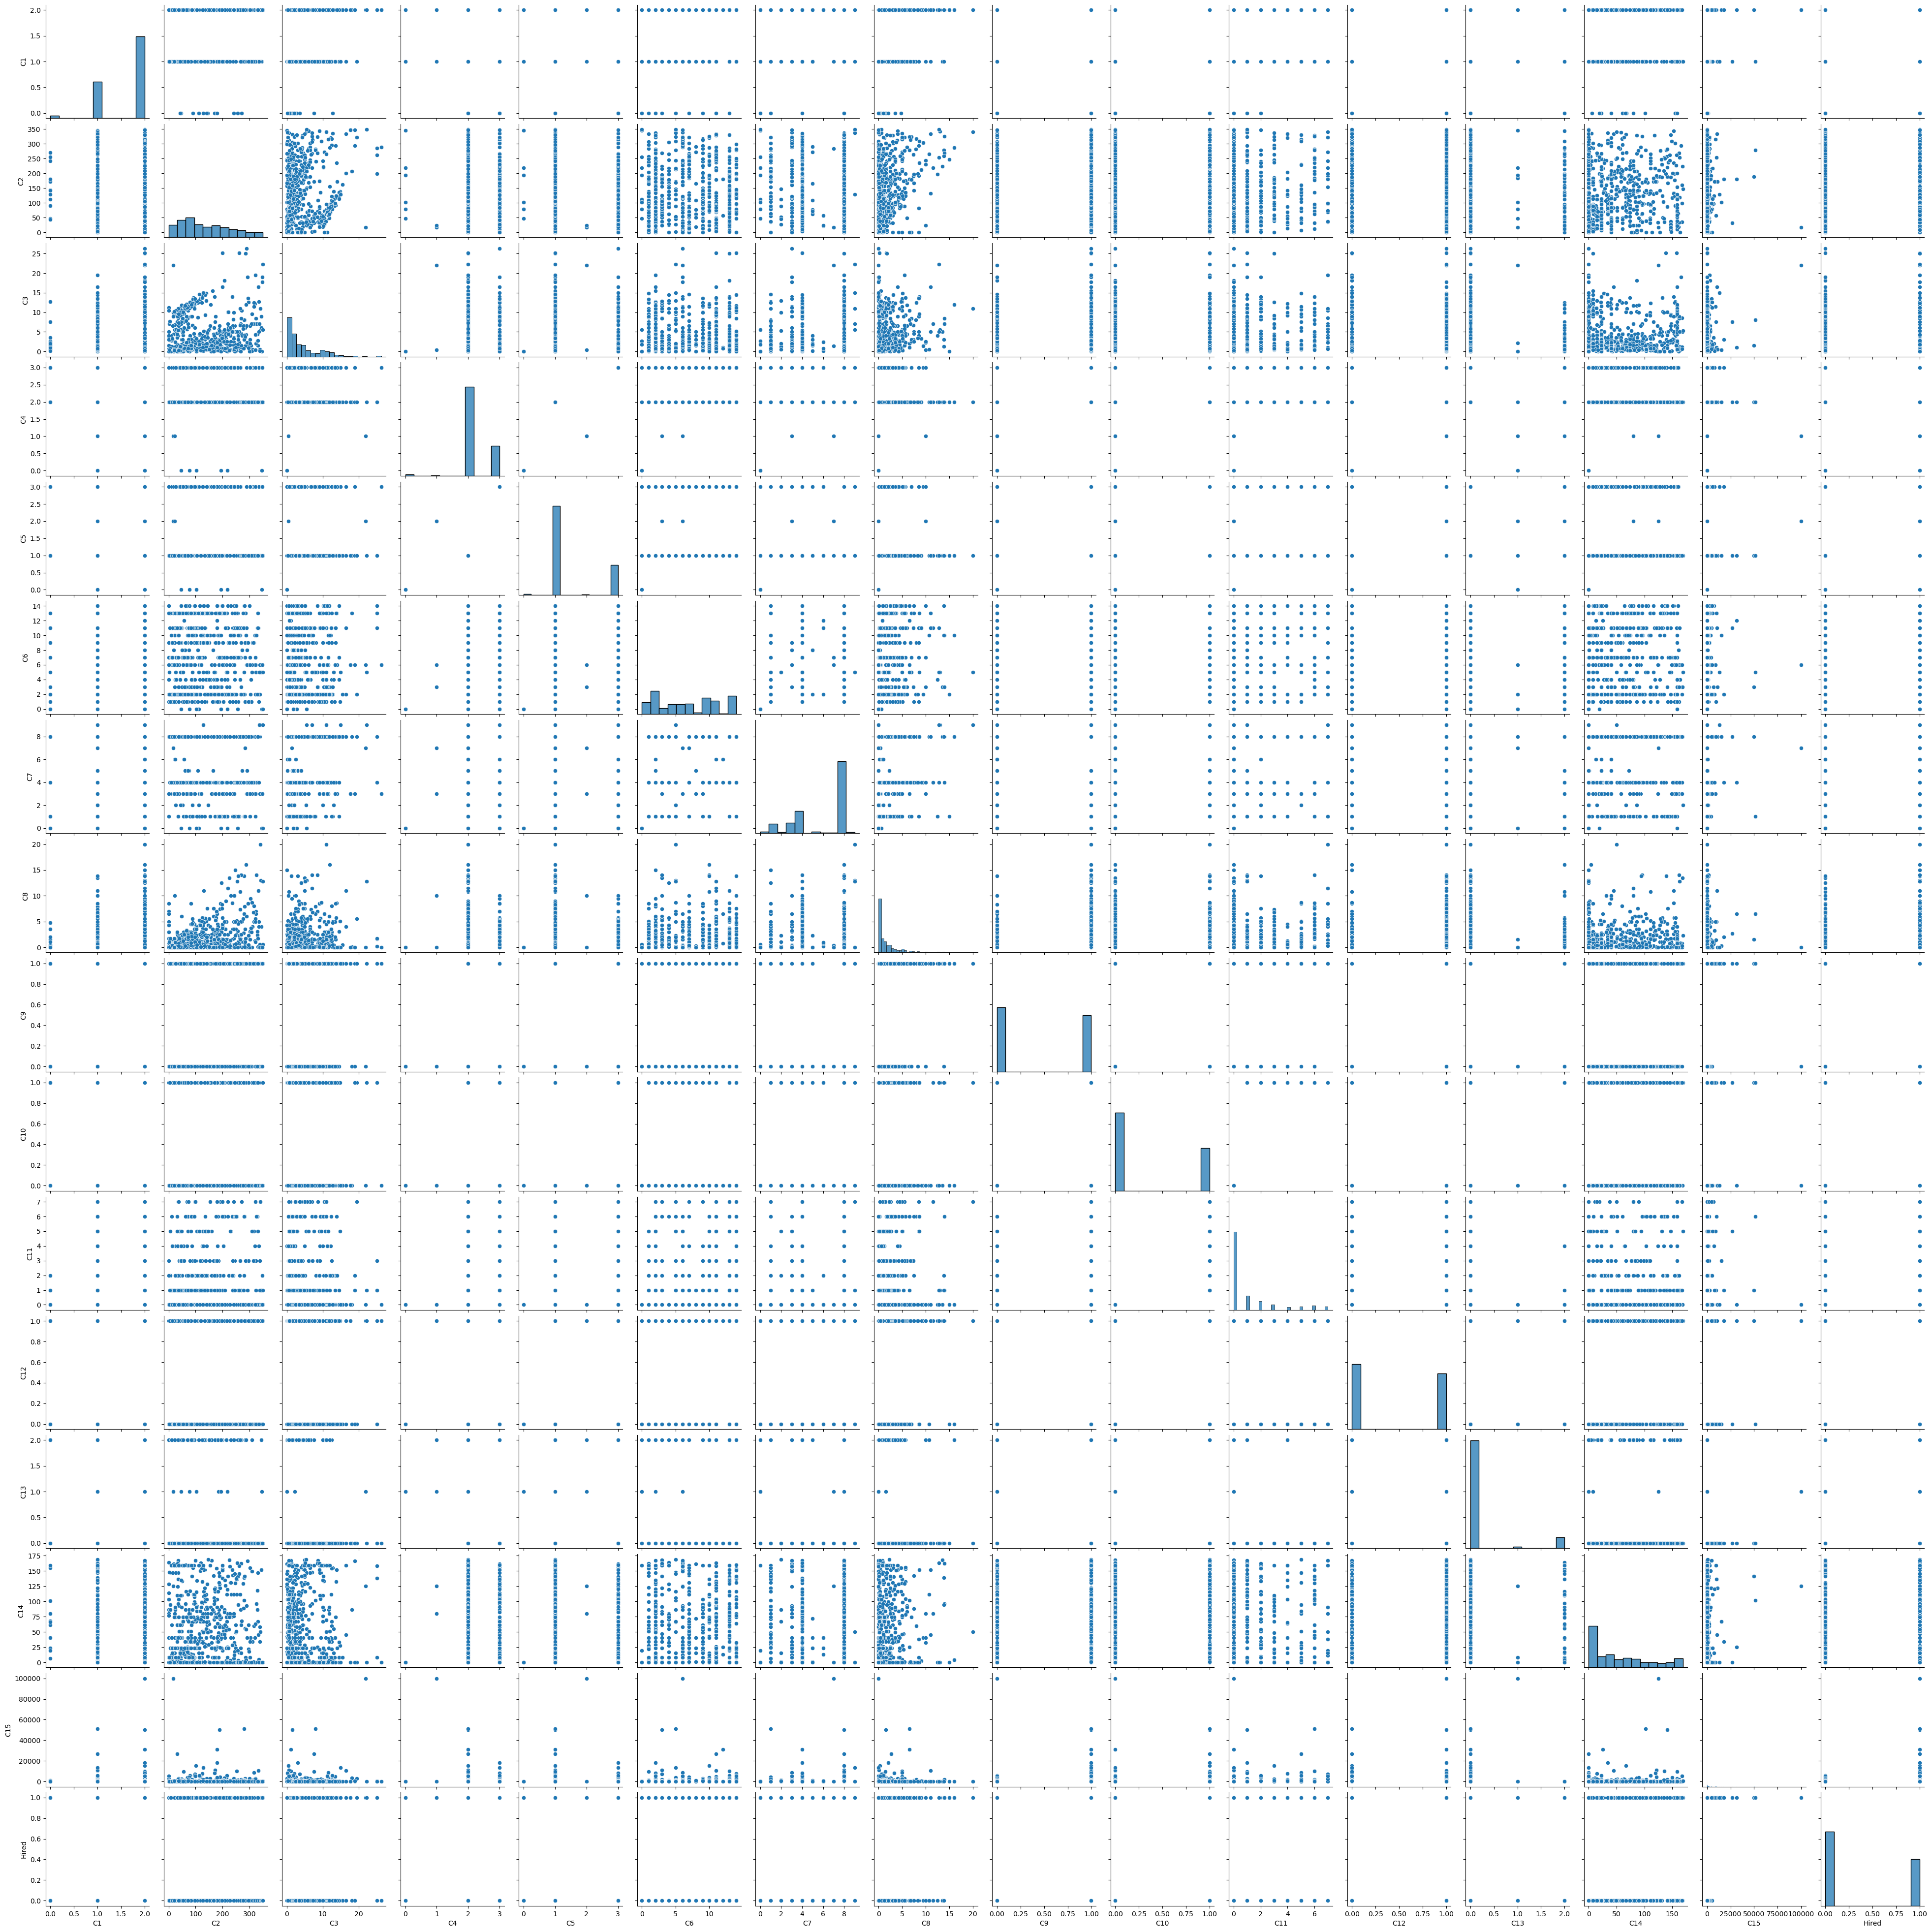

In [16]:
plt.figure(figsize=(15,10))
sns.pairplot(data = new_df1,)
plt.show()

In [17]:
df_cat=new_df1.select_dtypes(np.object_)     #seprating caterogorical columns

In [18]:
df_cat

""
0
1
2
3
4
...
685
686
687
688


In [19]:
df_num=new_df1.select_dtypes(np.number) #sperating numerical columns

In [20]:
df_num

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,2,157,0.000,2,1,13,8,1.25,1,1,1,0,0,42,0,1
1,1,329,4.460,2,1,11,4,3.04,1,1,6,0,0,118,560,1
2,1,90,0.500,2,1,11,4,1.50,1,0,0,0,0,74,824,1
3,2,126,1.540,2,1,13,8,3.75,1,1,5,1,0,1,3,1
4,2,44,5.625,2,1,13,8,1.71,1,0,0,0,2,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2,53,10.085,3,3,5,4,1.25,0,0,0,0,0,67,0,0
686,1,72,0.750,2,1,2,8,2.00,0,1,2,1,0,40,394,0
687,1,98,13.500,3,3,6,3,2.00,0,1,1,1,0,40,1,0
688,2,21,0.205,2,1,1,8,0.04,0,0,0,0,0,74,750,0


In [21]:
new_df1.tail(15)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
674,1,215,2.500,2,1,7,4,0.210,0,0,0,0,0,67,246,0
675,1,249,1.040,2,1,1,8,0.665,0,0,0,0,0,61,237,0
677,2,37,7.250,2,1,10,8,0.040,0,1,1,0,0,1,1,0
678,1,21,10.210,2,1,6,3,0.000,0,0,0,0,0,0,50,0
679,1,43,1.250,2,1,2,8,0.000,0,0,0,0,0,0,0,0
680,2,38,0.290,2,1,9,8,0.290,0,0,0,0,0,74,364,0
681,2,126,1.000,3,3,4,4,3.000,0,0,0,0,0,32,537,0
682,2,13,3.290,2,1,7,8,0.335,0,0,0,1,0,15,2,0
683,2,209,0.750,3,3,4,8,0.585,0,0,0,0,0,61,3,0
684,2,241,3.290,2,1,10,8,3.500,0,0,0,1,2,111,0,0


In [22]:
#sperating data and lables
x=new_df1.drop(columns='Hired' ,axis=1)  #freature
y=new_df1['Hired']   #target variable

In [23]:
# Standardization

# x = (x-mu)/sigma

scaler = StandardScaler()
standard_data = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_data, columns = x.columns)
standard_df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,0.665315,0.203139,-0.938112,-0.460733,-0.56060,1.458646,0.754567,-0.233739,1.066004,1.352296,-0.029845,-0.922776,-0.336262,-0.241548,-0.174956
1,-1.279697,2.070387,0.025483,-0.460733,-0.56060,0.996028,-0.793848,0.409157,1.066004,1.352296,2.651806,-0.922776,-0.336262,1.203135,-0.072364
2,-1.279697,-0.524220,-0.830086,-0.460733,-0.56060,0.996028,-0.793848,-0.143949,1.066004,-0.739483,-0.566175,-0.922776,-0.336262,0.366740,-0.024000
3,0.665315,-0.133400,-0.605391,-0.460733,-0.56060,1.458646,0.754567,0.664160,1.066004,1.352296,2.115476,1.083687,-0.336262,-1.020916,-0.174406
4,0.665315,-1.023600,0.277184,-0.460733,-0.56060,1.458646,0.754567,-0.068525,1.066004,-0.739483,-0.566175,-0.922776,3.088010,-0.887854,-0.174956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.665315,-0.925895,1.240779,1.579178,1.72291,-0.391824,-0.793848,-0.233739,-0.938083,-0.739483,-0.566175,-0.922776,-0.336262,0.233677,-0.174956
607,-1.279697,-0.719629,-0.776073,-0.460733,-0.56060,-1.085750,0.754567,0.035631,-0.938083,1.352296,0.506485,1.083687,-0.336262,-0.279566,-0.102775
608,-1.279697,-0.437371,1.978599,1.579178,1.72291,-0.160515,-1.180952,0.035631,-0.938083,1.352296,-0.029845,1.083687,-0.336262,-0.279566,-0.174772
609,0.665315,-1.273290,-0.893822,-0.460733,-0.56060,-1.317059,0.754567,-0.668322,-0.938083,-0.739483,-0.566175,-0.922776,-0.336262,0.366740,-0.037557


<Axes: xlabel='C1', ylabel='Density'>

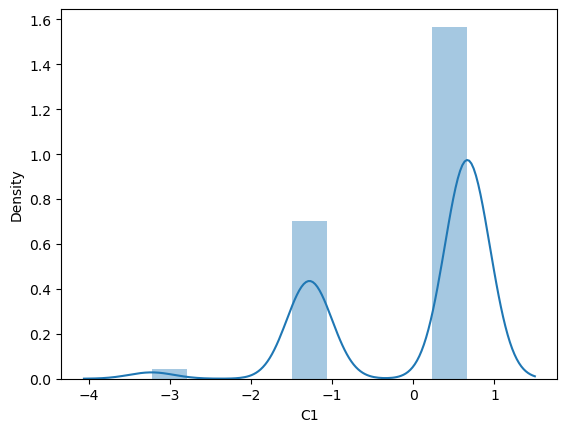

In [24]:
sns.distplot(standard_df['C1'])

In [25]:
# log transformation

log_transformed_data = np.log1p(x)
log_transformed_data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,1.098612,5.062595,0.000000,1.098612,0.693147,2.639057,2.197225,0.810930,0.693147,0.693147,0.693147,0.000000,0.000000,3.761200,0.000000
1,0.693147,5.799093,1.697449,1.098612,0.693147,2.484907,1.609438,1.396245,0.693147,0.693147,1.945910,0.000000,0.000000,4.779123,6.329721
2,0.693147,4.510860,0.405465,1.098612,0.693147,2.484907,1.609438,0.916291,0.693147,0.000000,0.000000,0.000000,0.000000,4.317488,6.715383
3,1.098612,4.844187,0.932164,1.098612,0.693147,2.639057,2.197225,1.558145,0.693147,0.693147,1.791759,0.693147,0.000000,0.693147,1.386294
4,1.098612,3.806662,1.890850,1.098612,0.693147,2.639057,2.197225,0.996949,0.693147,0.000000,0.000000,0.000000,1.098612,2.197225,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.098612,3.988984,2.405593,1.386294,1.386294,1.791759,1.609438,0.810930,0.000000,0.000000,0.000000,0.000000,0.000000,4.219508,0.000000
686,0.693147,4.290459,0.559616,1.098612,0.693147,1.098612,2.197225,1.098612,0.000000,0.693147,1.098612,0.693147,0.000000,3.713572,5.978886
687,0.693147,4.595120,2.674149,1.386294,1.386294,1.945910,1.386294,1.098612,0.000000,0.693147,0.693147,0.693147,0.000000,3.713572,0.693147
688,1.098612,3.091042,0.186480,1.098612,0.693147,0.693147,2.197225,0.039221,0.000000,0.000000,0.000000,0.000000,0.000000,4.317488,6.621406


<Axes: xlabel='C1', ylabel='Density'>

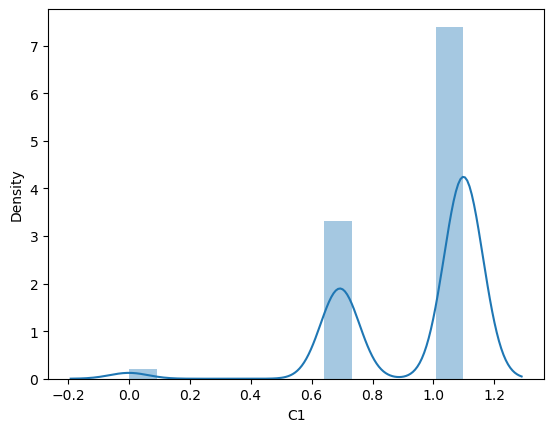

In [26]:
sns.distplot(log_transformed_data['C1'])

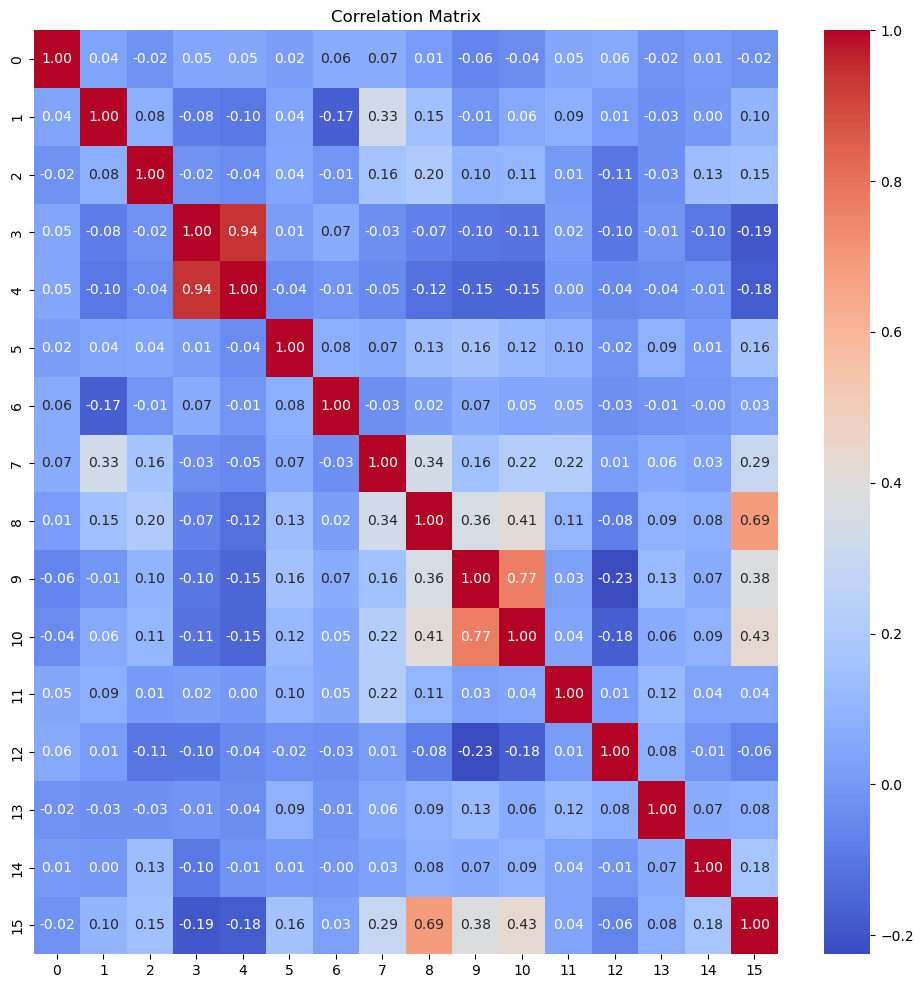

In [43]:
corr_matrix = np.corrcoef(new_df1, rowvar = False)
# Set the figure size (width, height) to increase the size of the heatmap
plt.figure(figsize=(12, 12))  # Adjust the size as per your needs
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

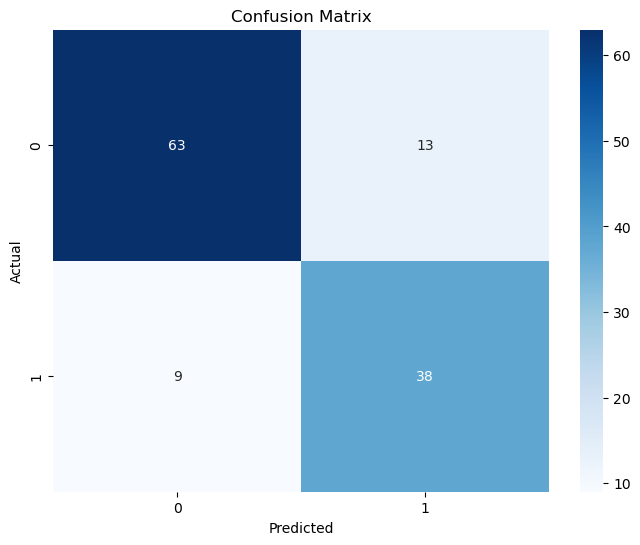

In [124]:
# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

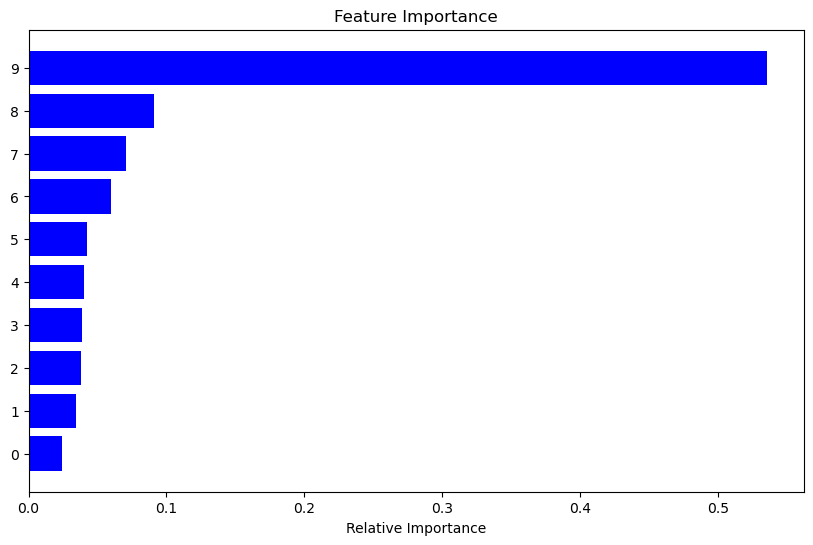

In [134]:
# Feature Importance Plot
importances = gbc.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices))) 
plt.xlabel('Relative Importance')
plt.show()

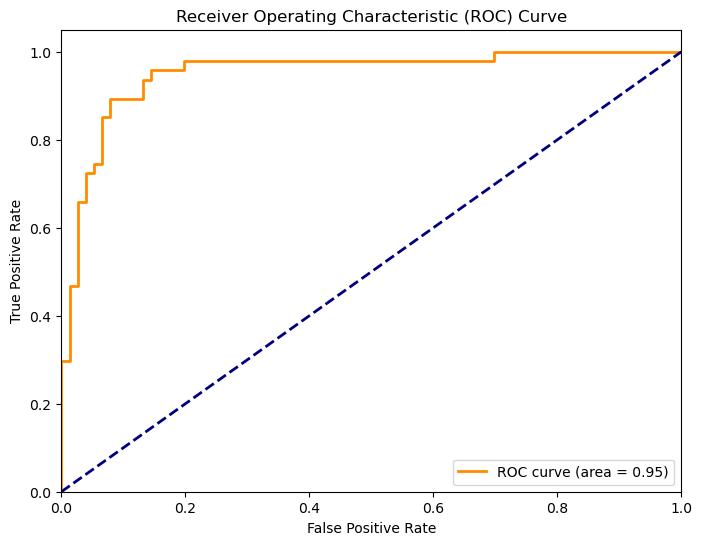

In [138]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, gbc.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [27]:
#Conducting Statistical Analysis on the Dataset

In [28]:
print(new_df1.describe())               #Descriptive Statistics

               C1          C2          C3          C4          C5          C6  \
count  611.000000  611.000000  611.000000  611.000000  611.000000  611.000000   
mean     1.657938  138.288052    4.342054    2.225859    1.490998    6.693944   
std      0.514557   92.189642    4.632293    0.490619    0.876562    4.326769   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   64.500000    0.875000    2.000000    1.000000    2.000000   
50%      2.000000  123.000000    2.500000    2.000000    1.000000    6.000000   
75%      2.000000  206.000000    6.500000    2.000000    2.000000   11.000000   
max      2.000000  349.000000   26.335000    3.000000    3.000000   14.000000   

               C7          C8          C9         C10         C11         C12  \
count  611.000000  611.000000  611.000000  611.000000  611.000000  611.000000   
mean     6.050736    1.900794    0.468085    0.353519    1.055646    0.459902   
std      2.585403    2.7865

In [ ]:
 #Hypothesis Testing

In [29]:
from scipy.stats import ttest_ind     
hired = new_df1[new_df1['Hired'] == 1]['C2']
not_hired = new_df1[new_df1['Hired'] == 0]['C2']
t_stat, p_value = ttest_ind(hired, not_hired)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 2.5755974809044515, P-value: 0.010241368527076125


In [ ]:
 #Chi-Square Test:

In [30]:
from scipy.stats import chi2_contingency          
contingency_table = pd.crosstab(new_df1['C1'], df['Hired'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, P-value: {p}")

Chi2: 1.8819596226661417, P-value: 0.39024528122446717


In [31]:
#Correlation Analysis

In [32]:
new_df1.corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
C1,1.000000,0.042065,-0.015238,0.046784,0.049498,0.023588,0.063590,0.067348,0.011673,-0.060692,-0.039900,0.051861,0.060212,-0.015807,0.008664,-0.017113
C2,0.042065,1.000000,0.079539,-0.082375,-0.097282,0.042540,-0.172217,0.330331,0.149184,-0.006624,0.058484,0.085313,0.011725,-0.031282,0.000895,0.103805
C3,-0.015238,0.079539,1.000000,-0.022724,-0.040410,0.043089,-0.008485,0.164835,0.201862,0.097873,0.106389,0.005646,-0.105568,-0.026755,0.134775,0.150750
C4,0.046784,-0.082375,-0.022724,1.000000,0.938654,0.014855,0.068495,-0.031926,-0.070895,-0.103258,-0.114025,0.016972,-0.103481,-0.010127,-0.097988,-0.192678
C5,0.049498,-0.097282,-0.040410,0.938654,1.000000,-0.041142,-0.006670,-0.046221,-0.121433,-0.148753,-0.153033,0.000110,-0.044535,-0.036129,-0.014835,-0.182005
C6,0.023588,0.042540,0.043089,0.014855,-0.041142,1.000000,0.077595,0.068987,0.133934,0.161632,0.119470,0.095710,-0.024159,0.091085,0.007250,0.157905
C7,0.063590,-0.172217,-0.008485,0.068495,-0.006670,0.077595,1.000000,-0.030329,0.019667,0.067643,0.045626,0.047979,-0.029384,-0.012464,-0.003668,0.027448
C8,0.067348,0.330331,0.164835,-0.031926,-0.046221,0.068987,-0.030329,1.000000,0.338674,0.156292,0.220631,0.223141,0.014850,0.056548,0.029730,0.287563
C9,0.011673,0.149184,0.201862,-0.070895,-0.121433,0.133934,0.019667,0.338674,1.000000,0.356045,0.408277,0.108380,-0.079577,0.093387,0.082438,0.687684
C10,-0.060692,-0.006624,0.097873,-0.103258,-0.148753,0.161632,0.067643,0.156292,0.356045,1.000000,0.765636,0.025150,-0.225214,0.125163,0.071101,0.379457


In [33]:
#training and testing data¶

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)

In [35]:
# Building the prediction model

In [36]:
print(x.shape,x_test.shape,x_train.shape)

(611, 15) (123, 15) (488, 15)


In [37]:
print(y.shape,y_test.shape,y_train.shape)

(611,) (123,) (488,)


In [38]:
# Building the prediction model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)


In [39]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [45]:
# Making predictions
y_pred1 = rf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.8861788617886179

In [55]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Accuracy: 0.8861788617886179
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91        76
           1       0.84      0.87      0.85        47

    accuracy                           0.89       123
   macro avg       0.88      0.88      0.88       123
weighted avg       0.89      0.89      0.89       123

Confusion Matrix:
 [[68  8]
 [ 6 41]]


In [57]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [59]:
log.fit(x_train,y_train)

LogisticRegression()

In [61]:
y_pred2 = log.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8455284552845529

In [63]:
y_pred2 = log.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.8455284552845529
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        76
           1       0.85      0.72      0.78        47

    accuracy                           0.85       123
   macro avg       0.85      0.82      0.83       123
weighted avg       0.85      0.85      0.84       123



In [65]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)

SVC()

In [67]:
y_pred3 = svm.predict(x_test)
accuracy_score(y_test,y_pred3)

0.7073170731707317

In [69]:
y_pred3 = svm.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:")
print(classification_report(y_test, y_pred3))

Accuracy: 0.7073170731707317
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.97      0.80        76
           1       0.87      0.28      0.42        47

    accuracy                           0.71       123
   macro avg       0.78      0.63      0.61       123
weighted avg       0.75      0.71      0.66       123



In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred4 = knn.predict(x_test)
accuracy_score(y_test,y_pred4)

0.7073170731707317

In [75]:
y_pred4 = knn.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred4))
print("Classification Report:")
print(classification_report(y_test, y_pred4))

Accuracy: 0.7073170731707317
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        76
           1       0.62      0.60      0.61        47

    accuracy                           0.71       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.71      0.71      0.71       123



In [77]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
y_pred5 = dt.predict(x_test)

In [83]:
accuracy_score(y_test,y_pred5)

0.8211382113821138

In [85]:
y_pred5 = dt.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Classification Report:")
print(classification_report(y_test, y_pred5))

Accuracy: 0.8211382113821138
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        76
           1       0.75      0.81      0.78        47

    accuracy                           0.82       123
   macro avg       0.81      0.82      0.81       123
weighted avg       0.83      0.82      0.82       123



In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [91]:
y_pred6 = gbc.predict(x_test)
accuracy_score(y_test,y_pred6)

0.8943089430894309

In [93]:
y_pred6 = gbc.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Classification Report:")
print(classification_report(y_test, y_pred6))

Accuracy: 0.8943089430894309
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        76
           1       0.81      0.94      0.87        47

    accuracy                           0.89       123
   macro avg       0.89      0.90      0.89       123
weighted avg       0.90      0.89      0.90       123



In [100]:
#to create new dataframe for final output
final_data=pd.DataFrame({'Models':['RF', 'LR', 'SVC', 'KNN', 'DT', 'GBC'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5),
                                accuracy_score(y_test,y_pred6)]})

In [102]:
final_data

,Models,ACC
0,RF,0.886179
1,LR,0.845528
2,SVC,0.707317
3,KNN,0.707317
4,DT,0.821138
5,GBC,0.894309


In [118]:
new_df1.tail(10)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
680,2,38,0.290,2,1,9,8,0.290,0,0,0,0,0,74,364,0
681,2,126,1.000,3,3,4,4,3.000,0,0,0,0,0,32,537,0
682,2,13,3.290,2,1,7,8,0.335,0,0,0,1,0,15,2,0
683,2,209,0.750,3,3,4,8,0.585,0,0,0,0,0,61,3,0
684,2,241,3.290,2,1,10,8,3.500,0,0,0,1,2,111,0,0
685,2,53,10.085,3,3,5,4,1.250,0,0,0,0,0,67,0,0
686,1,72,0.750,2,1,2,8,2.000,0,1,2,1,0,40,394,0
687,1,98,13.500,3,3,6,3,2.000,0,1,1,1,0,40,1,0
688,2,21,0.205,2,1,1,8,0.040,0,0,0,0,0,74,750,0
689,2,198,3.375,2,1,2,4,8.290,0,0,0,1,0,0,0,0


In [ ]:
#make a predictive system

In [140]:
input_data=(2,198,3.375,2,1,2,4,8.290,0,0,0,1,0,0,0)  #fill the encoded values in datatset
#chanching the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape predicting array as we are predicting for one instatnce
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=gbc.predict(input_data_reshape)
print(prediction)

if(prediction[0]==0):
    print("the candidate is not hired")
else:
    print(" the candidate is hired")

[0]
the candidate is not hired
